## Quick Look
A quick look at the dataset before putting apart the test set.

In [1]:
import sys
sys.path.append("..")

In [14]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from src.load import load_diamonds

In [24]:
# Set figsize
mpl.rcParams["figure.figsize"] = (15, 10)

In [3]:
# Load original dataset
diamonds = load_diamonds()
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


In [4]:
# Explore dtypes and non-null count
diamonds.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.6+ MB


In [8]:
# Explore categorical attributes
for colname, series in diamonds.select_dtypes(exclude="number").iteritems():
    print(f"{colname.title()}: VALUE COUNTS".center(80, "-"))
    print(series.value_counts())
    print()

-------------------------------Cut: VALUE COUNTS--------------------------------
Ideal        16250
Premium      10342
Very Good     9026
Good          3639
Fair          1198
Name: cut, dtype: int64

------------------------------Color: VALUE COUNTS-------------------------------
G    8565
E    7344
F    7162
H    6147
D    5063
I    4052
J    2122
Name: color, dtype: int64

-----------------------------Clarity: VALUE COUNTS------------------------------
SI1     9806
VS2     9204
SI2     6865
VS1     6099
VVS2    3778
VVS1    2776
IF      1365
I1       562
Name: clarity, dtype: int64



In [9]:
# Summary stats of numerical attributes
diamonds.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798121,61.745132,57.451892,5.731217,5.735248,3.538685,3938.101125
std,0.474880,1.434259,2.225893,1.123364,1.152859,0.710579,3992.645108
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5333.000000
max,5.010000,79.000000,79.000000,10.740000,58.900000,31.800000,18818.000000


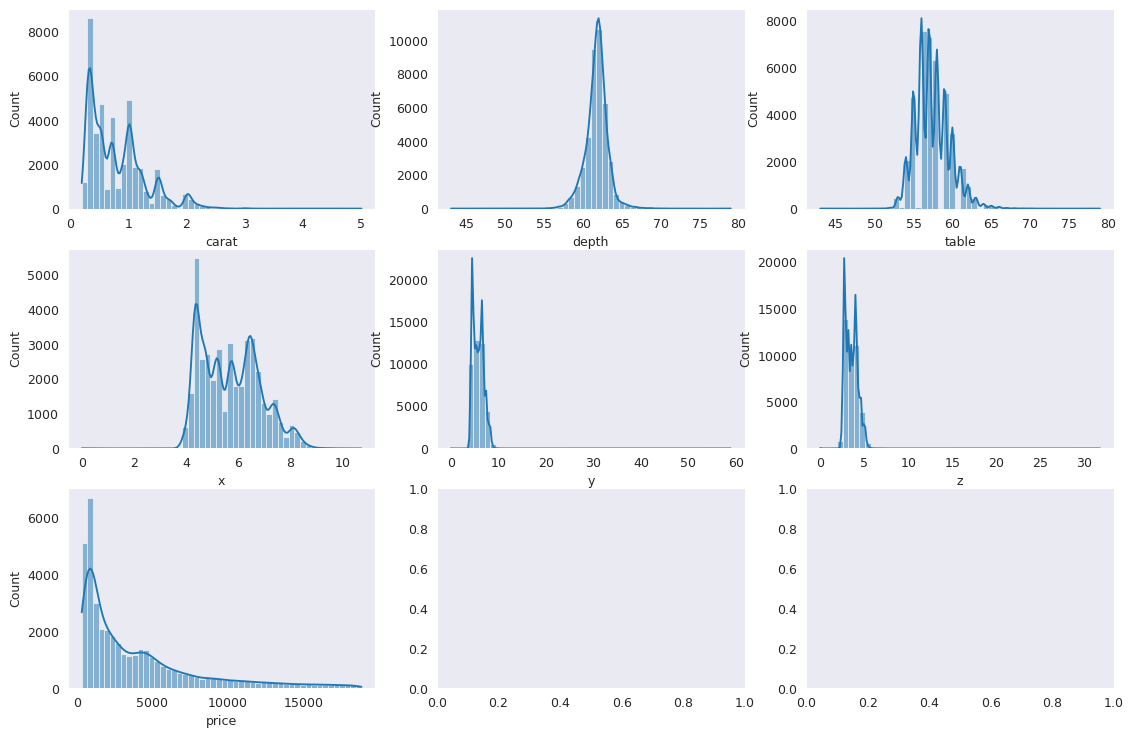

In [27]:
# Histograms of the numerical attributes
fig, axs = plt.subplots(3, 3)
for ax, attr in zip(axs.flat, diamonds.select_dtypes(include="number").columns):
    sns.histplot(diamonds, x=attr, bins=50, kde=True, ax=ax)
    ax.set(xlabel=attr)

### Insights
**carat** and **price** (target) have similar histograms (tail-heavy).

**table** has a bell-shaped histogram.

**depth** has a bell-shaped histogram.

**x**, **y**, and **z** have outliers. Moreover, the **depth** attribute is a combination of this attributes, so they may not be useful.

Except **depth** and **table**, the attributes have very different scales. Feature scaling is necessary.